<a href="https://www.kaggle.com/code/bhavinmoriya/binomial-vs-poisson-distribution?scriptVersionId=113660592" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

- Both Binomial and Poisson are discrete distributions.
- The Poisson distribution is actually a limiting case of a Binomial distribution when the number of trials, n, gets very large and p, the probability of success, is small. As a rule of thumb, if $n≥100$ and $np≤10$, the Poisson distribution (taking $\lambda=np$) can provide a very good approximation to the binomial distribution.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# n = 10
p = .5
k = 10
# lamb = n * p
bin_data = np.zeros(100)
poi_data = np.zeros(100)


for i in range(100):
    n = 10*(i+1)
    lamb = n * p
    bin_data[i] = binom.pmf(k, n, p)
#     sns.histplot(bin_data, label=f'Binomial dist with no of trials = {n}', alpha=.4)
    
    poi_data[i] = poisson.pmf(k, mu=lamb)
#     print(bin_data, poi_data)
#     plt.scatter(x=bin_data, y=poi_data)
#     sns.histplot(poi_data, label=f'Poisson with lambda = {lamb} trials')
#     plt.legend()

Next, we will see that for bigger n the poisson probability mass function and binomial mass function gives probabilities at most 10^{-5}. 

In [3]:
np.where(np.abs((bin_data - poi_data)) < 1e-5, 0, 1)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Following plot shows that among ten points about five points are in different places rest is all overlapped at almost (0,0) position.

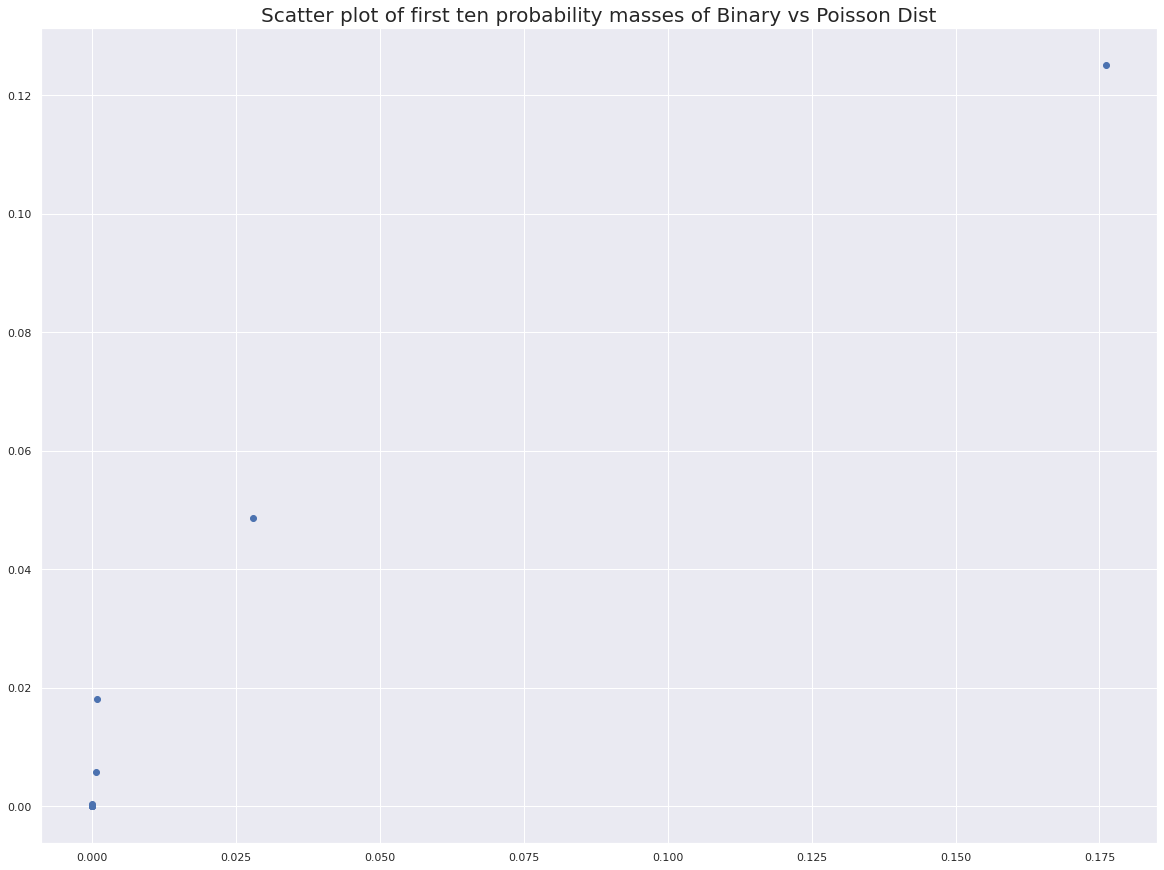

In [4]:
plt.figure(figsize=(20,15))
plt.scatter(x=bin_data[:10], y=poi_data[:10])
plt.title('Scatter plot of first ten probability masses of Binary vs Poisson Dist', fontsize=20);
# plt.plot(np.linspace(0,.2,100), np.linspace(0,.2,100))

A hexplot will give us better idea about clustering around (0,0).

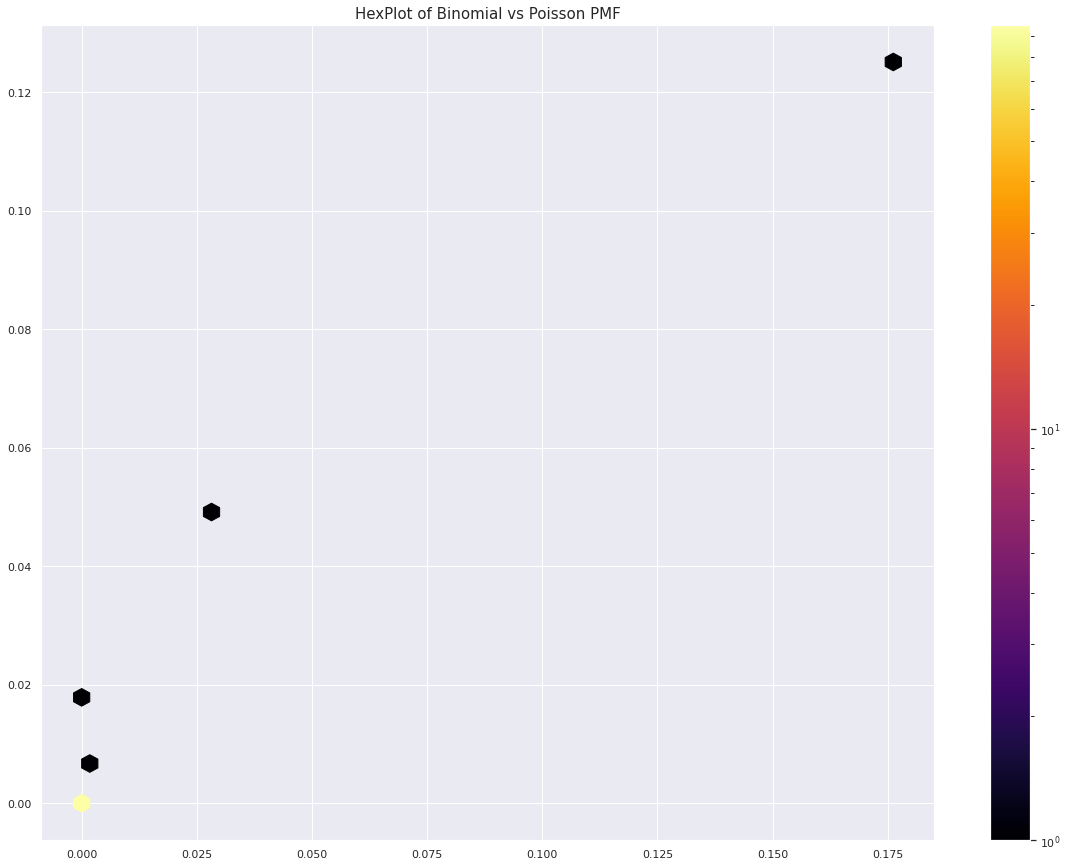

In [5]:
# plt.scatter(x=bin_data[-1], y=poi_data[-1])
fig, ax = plt.subplots(figsize=(20,15))
plt.hexbin(bin_data, poi_data,
           gridsize=50, bins='log', cmap='inferno')
plt.colorbar()
plt.title('HexPlot of Binomial vs Poisson PMF', fontsize=15);
# sns.jointplot(x=bin_data, y=poi_data, kind='hex')

So we could replace Binomial dist with Poisson if no of trials is big enough. 
- Binom dist PMF calculation requires calculating n! which could be difficult
- Poisson could be saviour in this case as both of them gives roughtly same Prob Mass.